In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.model_selection as skselect
import sklearn.datasets as skdata
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Building classifiers for digits

## Download the dataset (sklearn.datasets)

openml.org is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.

To load a dataset, the package sklearn.datasets is used.

The sklearn.datasets package is able to download datasets from openml.org using the function sklearn.datasets.fetch_openml. https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.datasets.fetch_openml/

MNIST dataset on openml: https://www.openml.org/d/554

scikit learn also provides a list of small standard datasets (7 datasets) for the purpose of testing machine learning algorithms. Acquiring these dataset do not require any download from some external website. Each dataset can be loaded using a specific function. These datasets are too small to be representative of real world machine learning tasks, but are useful to quickly illustrate the behavior of the implemented ML algorithms.

The mnist dataset is loaded using the function load_digits()

<img src=https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/digits-d7a3f41b.png>

### 1) Load the MNIST dataset

The function loads data as a bunch object (a dictionnary-like object which exposes its keys as attributes). the dataset contains a total of 1797 samples, where each sample is a 8x8 image of a handwritten digit. Each image is labeled with the digit it represents.

In [2]:
data=skdata.load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
data.images.shape, data.data.shape

((1797, 8, 8), (1797, 64))

In [14]:
len(data['target'])

1797

### 2) Visualize sample images using pyplot

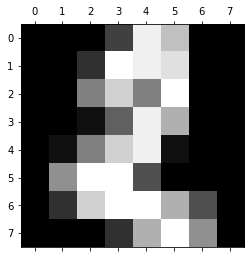

In [11]:
plt.matshow(data.images[2]) 
plt.gray()
plt.show()

For a classification problem, each one of the digits is considered as a class. The goal of classification is to correclty predict the class of any given image (This is a multiclass classification problem). 

### 3) Before going any further, Let's check the distribution of the classes in the dataset

Text(0, 0.5, 'Frequency')

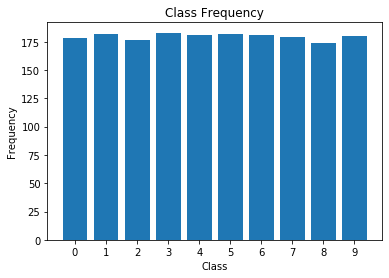

In [37]:
label, counts = np.unique(data.target, return_counts=True)
plt.bar(label, counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.xticks(range(0,10,1))
plt.ylabel('Frequency')

In [38]:
#count items for each class
for l, count in zip(label,counts):
    print ('class', l, ': %0.02f' %(count/len(data.target)*100), "%")

class 0 : 9.91 %
class 1 : 10.13 %
class 2 : 9.85 %
class 3 : 10.18 %
class 4 : 10.07 %
class 5 : 10.13 %
class 6 : 10.07 %
class 7 : 9.96 %
class 8 : 9.68 %
class 9 : 10.02 %


## Binary classification

In this part, we will try to build a classifier that correctly detect images of class '5'. Using scikitLearn, we evaluation the performance of the Decision Tree classifier: a tree-based model that can be used for binary as well as for multiclass classification

###  I. Create input and target vectors for the classifier and check class distribution. 
(The target vector will contain 0 and 1 depending on whether the target class is 5 or no)

In [16]:
X,y = data.data,data.target
y_5=(y==5)

Text(0, 0.5, 'Frequency')

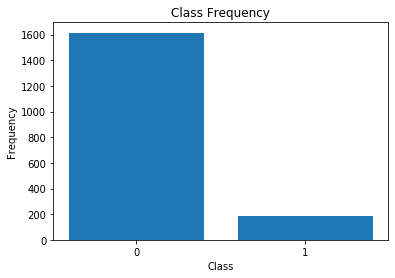

In [17]:
l, c = np.unique(y_5, return_counts=True)
plt.bar(l, c)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.xticks(range(0,2,1))
plt.ylabel('Frequency')

### II. Evaluation using holdout method

   ### 1-  Split data into 70% for train and 30% for test. We use the built-in function (train_test_split) of sklearn.model_selection

In [18]:
X_train,X_test,y_train_5,y_test_5 = skselect.train_test_split(X,y_5,test_size=0.3)

### 2- Train classifier and make predictions

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

clf = SVC( gamma='auto', probability=True)

clf.fit(X_train, y_train_5)
SCV_pred = clf.predict_proba(X_test)
(np.round(SCV_pred[:,1],2)>=0.5).astype(int).sum()/len(X_test)

0.06851851851851852

### 3-  Evaluate the results (using different metrics)

In [20]:
acc = metrics.accuracy_score(y_test_5, DT_pred)
print("Accuracy = %.2f" %(acc))
f1=metrics.f1_score(y_test_5,DT_pred)
print("F1 = %.2f" %(f1))
p=metrics.precision_score(y_test_5,DT_pred)
print("Precision = %.2f" %(p))
r=metrics.recall_score(y_test_5,DT_pred)
print("Recall = %.2f" %(r))
loss=metrics.log_loss(y_test_5,DT_pred)
print("log-loss = %.2f" %(loss))
auc=metrics.roc_auc_score(y_test_5,DT_pred)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.97
F1 = 0.86
Precision = 0.89
Recall = 0.83
log-loss = 1.15
ROC-AUC = 0.91


- Print/plot confusion matrix

In [21]:
metrics.confusion_matrix(y_test_5,DT_pred)

array([[467,   7],
       [ 11,  55]], dtype=int64)

In [24]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test_5, DT_pred)

ModuleNotFoundError: No module named 'scikitplot'

- plot ROC curve

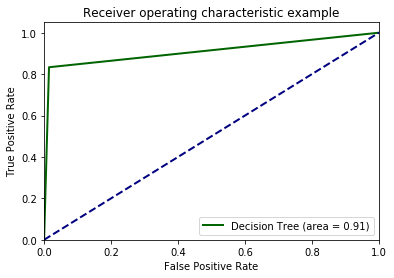

In [23]:
# Compute ROC curve and ROC area for class 1
DTfpr, DTtpr, _ = metrics.roc_curve(y_test_5, DT_pred)
DTroc_auc = metrics.auc(DTfpr, DTtpr)
lw = 2
plt.plot(DTfpr, DTtpr, color='darkgreen',
         lw=lw, label='Decision Tree (area = %0.2f)' % DTroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

- comparison with a dummy classifier

Accuracy = 0.82
F1 = 0.12
Precision = 0.12
Recall = 0.13
log-loss = 6.27
ROC-AUC = 0.51


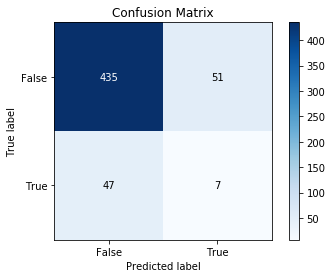

In [38]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
dummy_pred=dummy_clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test_5, dummy_pred)

acc = metrics.accuracy_score(y_test_5, dummy_pred)
print("Accuracy = %.2f" %(acc))
f1=metrics.f1_score(y_test_5,dummy_pred)
print("F1 = %.2f" %(f1))
p=metrics.precision_score(y_test_5,dummy_pred)
print("Precision = %.2f" %(p))
r=metrics.recall_score(y_test_5,dummy_pred)
print("Recall = %.2f" %(r))
loss=metrics.log_loss(y_test_5,dummy_pred)
print("log-loss = %.2f" %(loss))
auc=metrics.roc_auc_score(y_test_5,dummy_pred)
print("ROC-AUC = %.2f" %(auc))


## Multiclass classification

In [44]:
DT = DecisionTreeClassifier()

### Evaluation using cross validation

### 1. get cross validation scores using cross_val_score()

In [53]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(DT, X, y, cv=10, scoring='f1_macro')

In [54]:
print(f"Macro-f1 for each iteration: {cv}")
mean_macro_f1 = cv.mean()
std_macro_f1 = cv.std() * 2
print(f"Macro-f1 (statistics): {mean_macro_f1:.2f} (+/- {std_macro_f1:.2f})")

Macro-f1 for each iteration: [0.75905059 0.85906791 0.81797969 0.75978356 0.77858549 0.88912422
 0.9095713  0.79607293 0.84274173 0.80842768]
Macro-f1 (statistics): 0.82 (+/- 0.10)


### 1. get cross validation predictions using cross_val_predict()

In [71]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(DT, X, y, cv=10)

acc = metrics.accuracy_score(y, pred)
print("Accuracy = %.2f" %(acc))
f1=metrics.f1_score(y,pred,average="macro")
print("F1 = %.2f" %(f1))
p=metrics.precision_score(y,pred,average="macro")
print("Precision = %.2f" %(p))
r=metrics.recall_score(y,pred,average="macro")
print("Recall = %.2f" %(r))


Accuracy = 0.83
F1 = 0.83
Precision = 0.83
Recall = 0.83


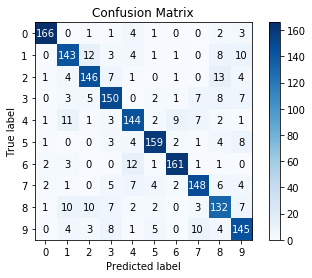

In [74]:
skplt.metrics.plot_confusion_matrix(y, pred)